# Study of Variation of Particulate Matter with respect to Temperature, Precipitation and Wind speed

---





*Authors: Siddharth Acharya*
*and Sahil Barbade*

---






In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os 

In [3]:
main = {}
for i in os.listdir():
    if '.csv' in i:
        main[i.rstrip('.csv')] = pd.read_csv(i)
        i = i.rstrip('.csv')
        main[i][[0,1,2]] = main[i]['From Date'].str.split('-', expand=True)
        main[i][[0,1,2]] = main[i]['From Date'].str.split('-', expand=True)
        main[i] = main[i].replace('None', np.nan)
        main[i][1] = main[i][1].astype('int')
        main[i][['PM10', 'Temp']] = main[i][['PM10', 'Temp']].astype('float')
        main[i] = main[i].groupby(1).mean()
        

C:\Users\siddh\AppData\Local\Temp\ipykernel_13200\2219981294.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  main[i] = main[i].groupby(1).mean()
C:\Users\siddh\AppData\Local\Temp\ipykernel_13200\2219981294.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  main[i] = main[i].groupby(1).mean()
C:\Users\siddh\AppData\Local\Temp\ipykernel_13200\2219981294.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  main[i]

In [4]:
main['Chennai']

,PM10,Temp
1,,
1,97.220667,25.160484
2,100.293571,26.673684
3,86.086301,28.243247
4,54.280984,30.412958
5,48.481667,31.677727
6,58.064167,31.893030
7,45.038167,29.862647
8,43.470323,29.707500
9,62.031833,28.915500


In [5]:
precip = pd.read_csv("./IMP/precipitation.csv").set_index("Unnamed: 0").transpose()
wind = pd.read_csv("./IMP/wind.csv").set_index("Average Speed").transpose()

In [6]:
precip.index = [i for i in range(1,13)]
wind.index = [i for i in range(1,13)]

In [7]:
for i in main:
    main[i]['precipitation'] = precip[i]
    main[i]['wind'] = wind[i]

<AxesSubplot:>

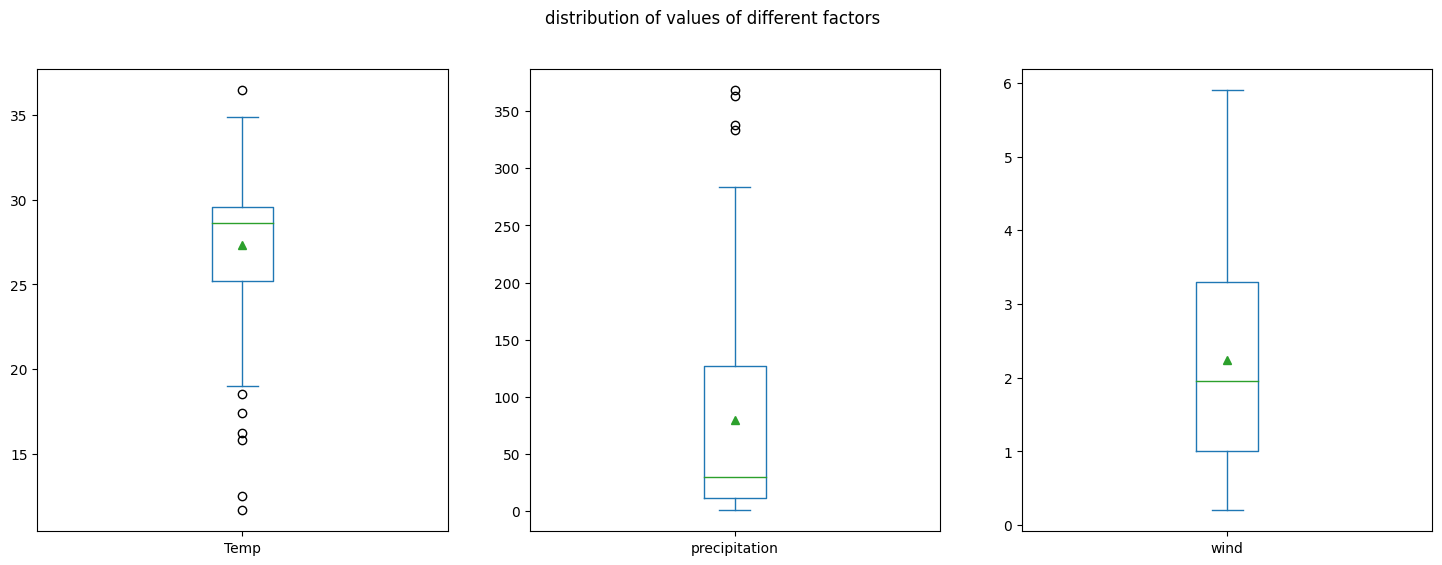

In [8]:
fig,ax = plt.subplots(figsize=(18, 6), nrows=1, ncols=3)
fig.suptitle('distribution of values of different factors')
pd.concat(list(main.values()), axis=0)['Temp'].plot.box(ax=ax[0], showmeans = 1)
pd.concat(list(main.values()), axis=0)['precipitation'].plot.box(ax = ax[1], showmeans = 1)
pd.concat(list(main.values()), axis=0)['wind'].plot.box(ax=ax[2], showmeans = 1)


In [9]:
sample = pd.concat(list(main.values()), axis=0)
sample.index = [i for i in range(120)]

In [10]:
sample

,PM10,Temp,precipitation,wind
0,97.220667,25.160484,29.8,1.3
1,100.293571,26.673684,13.1,1.3
2,86.086301,28.243247,5.9,1.7
3,54.280984,30.412958,12.0,2.5
4,48.481667,31.677727,39.9,3.1
...,...,...,...,...
115,87.875200,29.455200,153.2,3.5
116,84.468219,28.864178,190.3,2.9
117,106.402581,29.463226,210.3,2.7
118,120.806304,29.065000,79.7,3.3


<AxesSubplot:xlabel='wind', ylabel='PM10'>

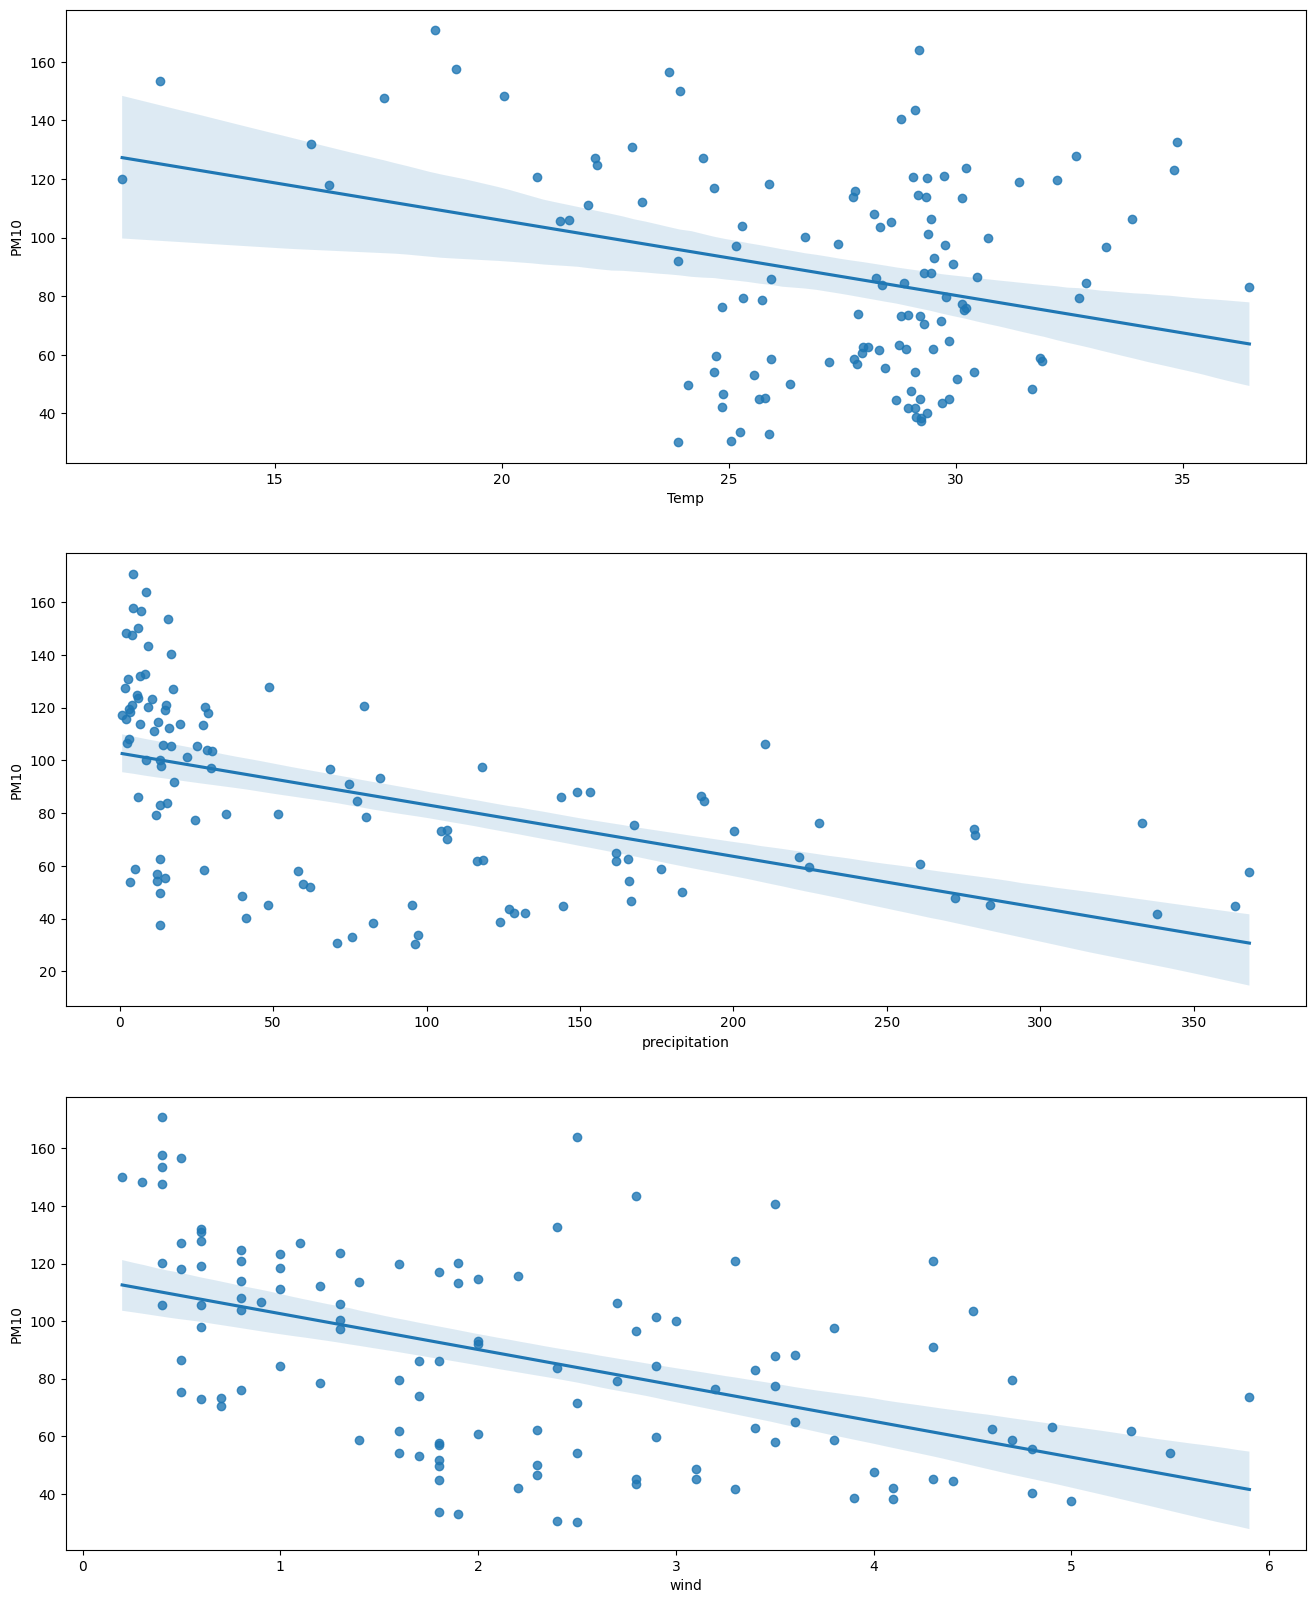

In [11]:
fig,axes = plt.subplots(nrows=3, ncols=1, figsize=[16,20])
sns.regplot(x = 'Temp', y = 'PM10', data=sample, ax=axes[0])
sns.regplot(x = 'precipitation', y = 'PM10', data=sample, ax=axes[1])
sns.regplot(x = 'wind', y = 'PM10', data=sample, ax=axes[2])

In [12]:
main_copy = main.copy()
for i in main_copy:
    main_copy[i]["Temp"] = main_copy[i]["Temp"].apply(lambda x: -1 if x<28 else 1)
    main_copy[i]["precipitation"] = main_copy[i]["precipitation"].apply(lambda x: -1 if x<80 else 1)
    main_copy[i]["wind"] = main_copy[i]["wind"].apply(lambda x: -1 if x<2.3 else 1)

In [13]:
final = pd.concat(list(main_copy.values()), axis=0)
final.index = [i for i in range(120)]

In [14]:
final['bins']= list(map(str, list(final[['Temp', 'precipitation', 'wind']].to_numpy())))

In [15]:
len(final['bins'].unique())

8

In [16]:
-1,-1,1

(-1, -1, 1)

*for finding number of repitetion*

In [17]:
repetetions = final.groupby('bins').agg(len)['PM10']
repetetions

bins
[ 1  1 -1]     8
[ 1 -1  1]    24
[ 1 -1 -1]    15
[-1  1  1]     7
[-1  1 -1]     8
[-1 -1  1]     2
[-1 -1 -1]    35
[1 1 1]       21
Name: PM10, dtype: int64

In [18]:
final.groupby('bins').mean()['PM10']

bins
[ 1  1 -1]     76.189821
[ 1 -1  1]     88.328767
[ 1 -1 -1]    107.849541
[-1  1  1]     52.949944
[-1  1 -1]     59.702406
[-1 -1  1]     44.682849
[-1 -1 -1]    110.328280
[1 1 1]        62.668464
Name: PM10, dtype: float64

In [19]:
(final.groupby('bins').agg(len)['PM10']-1)*final.groupby('bins').mean()['PM10']

bins
[ 1  1 -1]     533.328748
[ 1 -1  1]    2031.561636
[ 1 -1 -1]    1509.893576
[-1  1  1]     317.699663
[-1  1 -1]     417.916845
[-1 -1  1]      44.682849
[-1 -1 -1]    3751.161531
[1 1 1]       1253.369272
Name: PM10, dtype: float64

---






*ANNOVA*

---








In [20]:
Mean = final['PM10'].mean()

temp_effect = (((final.groupby("Temp").mean()-Mean)**2)['PM10']*((final.groupby("Temp").agg(len))['PM10'])).sum()
p_effect = (((final.groupby("precipitation").mean()-Mean)**2)['PM10']*((final.groupby("precipitation").agg(len))['PM10'])).sum()
w_effect = (((final.groupby("wind").mean()-Mean)**2)['PM10']*((final.groupby("wind").agg(len))['PM10'])).sum()



C:\Users\siddh\AppData\Local\Temp\ipykernel_13200\316226771.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_effect = (((final.groupby("Temp").mean()-Mean)**2)['PM10']*((final.groupby("Temp").agg(len))['PM10'])).sum()
C:\Users\siddh\AppData\Local\Temp\ipykernel_13200\316226771.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  p_effect = (((final.groupby("precipitation").mean()-Mean)**2)['PM10']*((final.groupby("precipitation").agg(len))['PM10'])).sum()
C:\Users\siddh\AppData\Local\Temp\ipykernel_13200\316226771.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is depr

In [33]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    display(sample[['PM10',	'Temp',	'precipitation',	'wind']])

,PM10,Temp,precipitation,wind
0,97.221,25.160,29.8,1.3
1,100.294,26.674,13.1,1.3
2,86.086,28.243,5.9,1.7
3,54.281,30.413,12.0,2.5
4,48.482,31.678,39.9,3.1
5,58.064,31.893,58.0,3.5
6,45.038,29.863,95.3,2.8
7,43.470,29.707,126.8,2.8
8,62.032,28.916,118.5,2.3
9,73.861,27.851,278.4,1.7


In [22]:
display(w_effect.__round__(3),
        temp_effect.__round__(3),
        p_effect.__round__(3))

22205.491

2391.39

40500.064

In [23]:
error = (final.groupby('bins').var()['PM10']*(final.groupby('bins').count()['PM10']-1)).sum()

In [24]:
error.__round__(3)

87340.396

In [25]:
(final['PM10']*final['PM10']).sum().__round__(4)

1056139.2664

In [26]:
((Mean**2)*120).__round__(3)

912166.819

In [27]:
final['int1'] = final['Temp']*final['precipitation']
final['int2'] = final['wind']*final['precipitation']
final['int3'] = final['wind']*final['Temp']
final['int0'] = final['wind']*final['Temp']*final['precipitation']

In [28]:
for i in range(0,4):
    print((((final.groupby(f"int{i}").mean()-Mean)**2)['PM10']*((final.groupby(f"int{i}").agg(len))['PM10'])).sum().__round__(3))

9161.59
502.287
4891.168
449.226


C:\Users\siddh\AppData\Local\Temp\ipykernel_13200\1716900220.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print((((final.groupby(f"int{i}").mean()-Mean)**2)['PM10']*((final.groupby(f"int{i}").agg(len))['PM10'])).sum().__round__(3))
C:\Users\siddh\AppData\Local\Temp\ipykernel_13200\1716900220.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print((((final.groupby(f"int{i}").mean()-Mean)**2)['PM10']*((final.groupby(f"int{i}").agg(len))['PM10'])).sum().__round__(3))
C:\Users\siddh\AppData\Local\Temp\ipykernel_13200\1716900220.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.

In [29]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform three-way ANOVA
model = ols("""PM10 ~ C(Temp) + C(precipitation) + C(wind) +
               C(Temp):C(precipitation) + C(Temp):C(wind) + C(precipitation):C(wind) +
               C(Temp):C(precipitation):C(wind)""", data=final).fit()

ddg = sm.stats.anova_lm(model, typ=1)
ddg.index= [ddg.index]

 Source | DOF | Sum of Squares | Mean Squares | F values|
| --- | --- | --- | --- | --- |
Temp |	1.0	| 2391.390128|	2391.390128|	3.066573|\	
Precipitation | 1.0	| 38530.968553|	38530.968553|	49.409765|\	
Wind | 1.0	| 9487.224676|	9487.224676|	12.165839|\	
Temp*Precipitation | 1.0|	1381.476971|	1381.476971|	1.771522|\	
Temp*Wind | 1.0|	357.961798|	357.961798|	0.459028|\	
Precipitation*Wind | 1.0|	1886.243416|	1886.243416|	2.418804|\	
Temp*Precipitation*Wind | 1.0|	2596.786036|	2596.786036|	3.329960|\	
Residual | 112.0|	87340.395873|	779.824963|	NaN|	

In [30]:
final[['PM10', 'Temp', 'precipitation', 'wind']]

,PM10,Temp,precipitation,wind
0,97.220667,-1,-1,-1
1,100.293571,-1,-1,-1
2,86.086301,1,-1,-1
3,54.280984,1,-1,1
4,48.481667,1,-1,1
...,...,...,...,...
115,87.875200,1,1,1
116,84.468219,1,1,1
117,106.402581,1,1,1
118,120.806304,1,-1,1


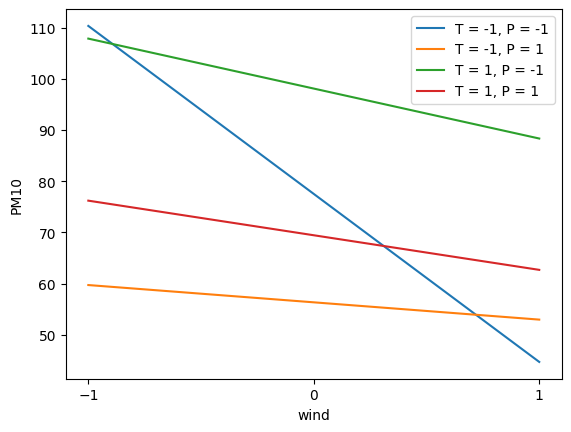

In [75]:
imp = final.groupby('bins').mean()

fig = plt.figure()

levels = [-1,1]
for i in levels:
    for j in levels:
        target = imp.loc[(imp['Temp'] == i) & (imp['precipitation'] == j)]
        y = target['PM10'].to_list()
        x = target['wind'].to_list()
        pll = plt.plot(x,y, label = f"T = {i}, P = {j}")
        plt.xlabel('wind')
        plt.ylabel("PM10")
        plt.xticks([-1,0,1])
plt.legend()

,PM10,Temp,precipitation,wind,int1,int2,int3,int0
bins,,,,,,,,
[ 1 1 -1],76.189821,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0
[ 1 -1 1],88.328767,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0
[ 1 -1 -1],107.849541,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0
[-1 1 1],52.949944,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0
[-1 1 -1],59.702406,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0
[-1 -1 1],44.682849,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0
[-1 -1 -1],110.328280,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0
[1 1 1],62.668464,1.0,1.0,1.0,1.0,1.0,1.0,1.0
